# Clustering and PCA Assignment


# Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Importing the required libraries

In [5542]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

import warnings
warnings.filterwarnings('ignore')

#  1. <u>Data Sourcing</u>
Reading the dataset from the given dataset

In [5543]:
# read the dataset
data = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)

data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

# 2. <u>Understanding the Data</u>

In [5544]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5546]:
data.shape

(167, 10)

Here the shape of the dataset is (167,10) which means we have 167 rows and 10 columns. There are less rows in the dataset and hence we need to be careful while treating the missing values and outliers.

In [5547]:
data.tail()

country  child_mort  exports  health  imports  income  inflation  \
162    Vanuatu        29.2     46.6    5.25     52.7    2950       2.62   
163  Venezuela        17.1     28.5    4.91     17.6   16500      45.90   
164    Vietnam        23.3     72.0    6.84     80.2    4490      12.10   
165      Yemen        56.3     30.0    5.18     34.4    4480      23.60   
166     Zambia        83.1     37.0    5.89     30.9    3280      14.00   

     life_expec  total_fer   gdpp  
162        63.0       3.50   2970  
163        75.4       2.47  13500  
164        73.1       1.95   1310  
165        67.5       4.67   1310  
166        52.0       5.40   1460

In [5548]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# 3. <u>Data Cleansing</u>

# Data Type Check
## - Converting GDPP into float from int.

#### Here the gdpp column is given as int so we convert it into float.

In [5549]:
# convert int into float
data = data.astype({"gdpp": float})

# Duplicate Value Check

In [5550]:
data.country.value_counts()

Nigeria           1
Guinea            1
Cyprus            1
Czech Republic    1
Myanmar           1
                 ..
Timor-Leste       1
Bahrain           1
Spain             1
Iran              1
Poland            1
Name: country, Length: 167, dtype: int64

There are nearly 167 countries with 1 record for each. And hence there are no duplicates too.


# - Missing Values Check

Now let us check the missing values in the given dataset.

In [5551]:
# missing values
round(100*(data.isnull().sum())/len(data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### There is no missing values in the given dataset. So we need not remove any missing values. So proceeding to the next step  <br/> <br/>

# 3. <u>Data Preparation</u>

### Derived Metrics
Here the fields imports, exports, health are given as percentage with respect to GDPP. So we convert them into their absolute values  as below:
  1. Imports=(Imports % / 100 )* GDPP
  2. Exports=(Exports % / 100 )* GDPP

In [5552]:
data['health']=(data['health']/100 ) * data['gdpp']
data['imports']=(data['imports']/100 ) * data['gdpp']
data['exports']=(data['exports']/100 ) * data['gdpp']

In [5553]:
data.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer     gdpp  
0       9.44        56.2       5.82    553.0  
1       4.49        76.3       1.65   4090.0  
2      16.10        76.5       2.89   4460.0  
3      22.40        60.1       6.16   3530.0  
4       1.44        76.8       2.13  12200.0

In [5554]:
y = data.pop("country")

In [5555]:
data.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer     gdpp  
0       5.82    553.0  
1       1.65   4090.0  
2       2.89   4460.0  
3       6.16   3530.0  
4       2.13  12200.0

# 4. Data Visualisation

# Inspecting the correlation of the data using heatmap

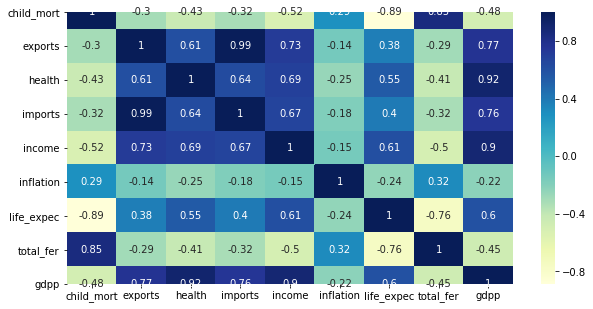

In [5556]:

plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

From the above graph we can see there are quite a few columns whose values are highly correlated. So we need to perform PCA and reduce the dimensions such that the multicollinearity of the data is properly handled.


## <u>Outlier Treatment</u>
<br/> The outlier has the following steps:
    1. Detecting the outliers
    2. Analysing the outliers
    3. Removing the outliers
<br/>


### Step 1: Detecting the outliers:
    

In [5557]:
#Step 1: Detecting the outliers:
plt.figure(figsize=(18,10))
var=data.columns
for i in enumerate(var):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1],data=data)
    

### Step 2: Analyzing the outliers:
From the above box plot, we can understand that few columns have more outliers and few have less.
Now we follow the following strategy:
    We divide the columns into 2 groups:
  
        -  columns with more outliers which we leave it as such since the large amount of outliers may form its own cluster. 
        -  columns with less outliers which we cap or drop them.
        
 ### Group 1: columns with more outliers:
     1. gdpp
     2. income
     3. child_mort
     4. exports
     5. imports
     
     
 ### Group 2: columns with less outliers:
     1. health
     2. inflation
     3. life_expec
     4. total_fer

Here group 2 columns have few outliers , so we decide to drop them or capping them.


### Step 3: Removing the outliers

In [5558]:
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = data['child_mort'].quantile([0.05,0.95]).values
data['child_mort'][data['child_mort'] <= percentiles[0]] = percentiles[0]
data['child_mort'][data['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data['health'].quantile([0.05,0.95]).values
data['health'][data['health'] <= percentiles[0]] = percentiles[0]
data['health'][data['health'] >= percentiles[1]] = percentiles[1]

percentiles = data['life_expec'].quantile([0.05,0.95]).values
data['life_expec'][data['life_expec'] <= percentiles[0]] = percentiles[0]
data['life_expec'][data['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data['total_fer'].quantile([0.05,0.95]).values
data['total_fer'][data['total_fer'] <= percentiles[0]] = percentiles[0]
data['total_fer'][data['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data['income'].quantile([0.05,0.95]).values
data['income'][data['income'] <= percentiles[0]] = percentiles[0]
data['income'][data['income'] >= percentiles[1]] = percentiles[1]

percentiles = data['inflation'].quantile([0.05,0.95]).values
data['inflation'][data['inflation'] <= percentiles[0]] = percentiles[0]
data['inflation'][data['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data['gdpp'].quantile([0.05,0.95]).values
data['gdpp'][data['gdpp'] <= percentiles[0]] = percentiles[0]
data['gdpp'][data['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data['imports'].quantile([0.05,0.95]).values
data['imports'][data['imports'] <= percentiles[0]] = percentiles[0]
data['imports'][data['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data['exports'].quantile([0.05,0.95]).values
data['exports'][data['exports'] <= percentiles[0]] = percentiles[0]
data['exports'][data['exports'] >= percentiles[1]] = percentiles[1]

### Step 4: Verifying after removing the outliers:

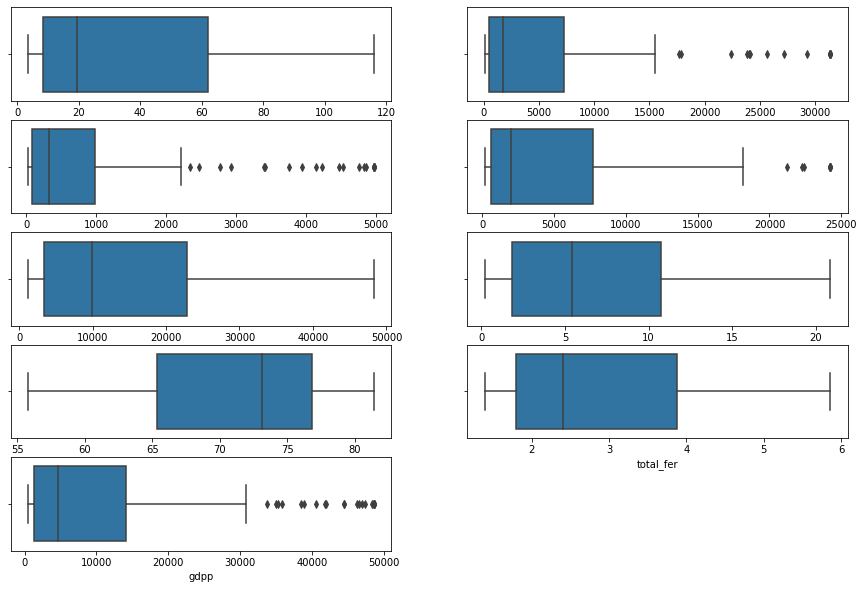

In [5559]:
#Step 1: Detecting the outliers:
plt.figure(figsize=(15,10))
var=data.columns
for i in enumerate(var):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1],data=data)
    

Here we could see that few columns still have little data as outliers, but we choose to keep them owing to the less data.

Now that we had successfully removed the outliers, now we proceed on to the next step which is scaling the data.

# <u>Principal Component Analysis</u>

# 1. Scaling the data

In [5560]:
from sklearn.preprocessing import StandardScaler

In [5561]:
scaler = StandardScaler()

In [5562]:
X = data.copy()

In [5563]:
x = scaler.fit_transform(X)

In [5564]:
x[:5,:5]

array([[ 1.47958789, -0.66803864, -0.62977844, -0.73329118, -0.96057509],
       [-0.56002364, -0.54238923, -0.47380714, -0.47267353, -0.39559048],
       [-0.26350403, -0.47604845, -0.53034406, -0.56066765, -0.19390727],
       [ 2.19456041, -0.41916472, -0.58927185, -0.54359772, -0.6692549 ],
       [-0.73460995, -0.02729653, -0.15095252,  0.30614255,  0.22711492]])

In [5565]:
X.max()

child_mort      116.000
exports       31385.100
health         4966.701
imports       24241.560
income        48290.000
inflation        20.870
life_expec       81.400
total_fer         5.861
gdpp          48610.000
dtype: float64

In [5566]:
# Check the current variance of each column
100*X.var()/sum(X.var())

child_mort    2.304906e-04
exports       1.295004e+01
health        3.715642e-01
imports       7.885064e+00
income        3.838538e+01
inflation     6.920108e-06
life_expec    1.137134e-05
total_fer     3.639663e-07
gdpp          4.040770e+01
dtype: float64

Here the variance is maximum for income and gdpp

# Applying PCA on the data

In [5567]:
from sklearn.decomposition import PCA

In [5568]:
pca = PCA(svd_solver = 'randomized', random_state=42)

In [5569]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [5570]:
pca.components_

array([[-0.31370269,  0.3507987 ,  0.35117815,  0.36823124,  0.37600029,
        -0.17399218,  0.34308686, -0.29811056,  0.37600871],
       [ 0.48684113,  0.33097569,  0.24315695,  0.26930019,  0.16807187,
         0.20045729, -0.34450382,  0.51847097,  0.25664488],
       [-0.17763592,  0.06865384, -0.13607851, -0.04200452,  0.17010197,
         0.93794124,  0.15426058, -0.10473969, -0.00389912],
       [ 0.02276945, -0.53686278,  0.64515576, -0.38273615,  0.01264167,
         0.10608158,  0.18223721,  0.15311285,  0.28368985],
       [ 0.12839534, -0.08487856,  0.20033804, -0.04421243,  0.07457851,
         0.07932579, -0.67371553, -0.67970463,  0.08046529],
       [ 0.1076401 , -0.12068475, -0.4231057 , -0.38460027,  0.74879481,
        -0.17145666, -0.03640109,  0.06088361,  0.22757439],
       [-0.77529381, -0.03982588,  0.0371735 ,  0.00485008,  0.05733254,
        -0.02440683, -0.50118517,  0.37360537,  0.03574582],
       [-0.05482803,  0.44271452, -0.15457504, -0.49759106, -0

In [5571]:
pca.explained_variance_ratio_

array([0.68508868, 0.14727819, 0.09507098, 0.03147493, 0.01636993,
       0.0119143 , 0.00890517, 0.00252245, 0.00137538])

<BarContainer object of 9 artists>

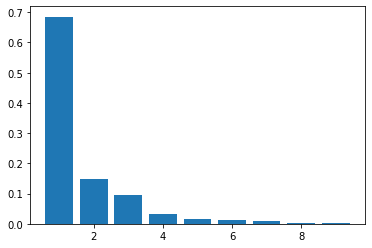

In [5572]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [5573]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(var_cumu)

[0.68508868 0.83236687 0.92743785 0.95891277 0.9752827  0.987197
 0.99610217 0.99862462 1.        ]


Here almost 95% of the variance is explained by 4 components.

## Making the scree plot

Text(0, 0.5, 'Cumulative Variance')

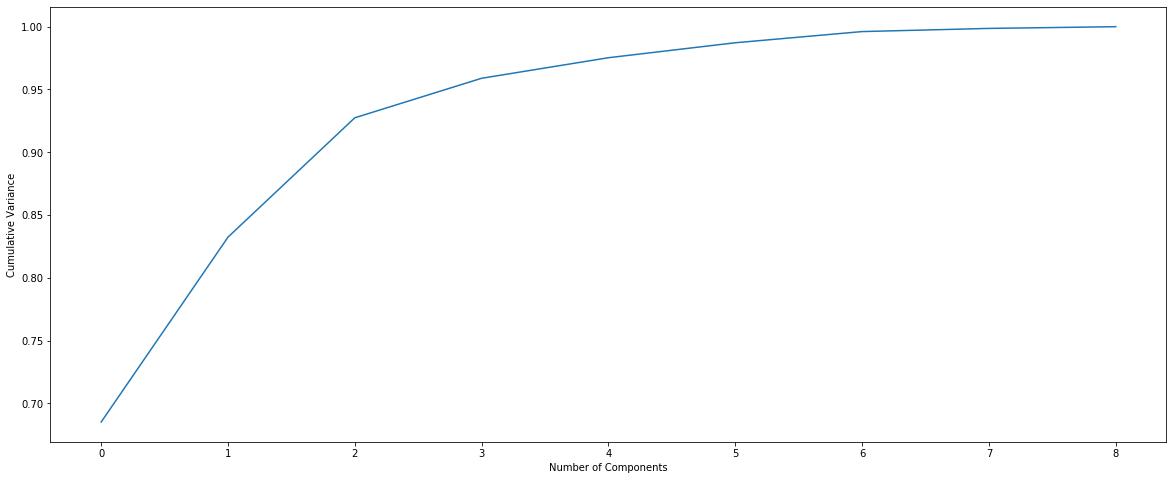

In [5574]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (20,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

#### As we can see in the above scree plot, almost 95% of the cumulative variance is explained by number of components=4, so the optimal number of components is chosen to be the number 4. So we choose to have 4 components.

# PCA with 4 components:

In [5575]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)

In [5576]:
newdata = pca_final.fit_transform(x)

In [5577]:
newdata.shape

(167, 4)

Making a dataframe out of it for convenience



In [5578]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(newdata)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1],'PC3': pc[2], 'PC4':pc[3] })
pca_df3=pca_df2.copy()

In [5579]:
# Check the head of the resultant data
pca_df2.head()

PC1       PC2       PC3       PC4
0 -3.131872  1.546674 -0.481267  0.055881
1 -0.131785 -1.671799 -0.100328 -0.049290
2 -0.741069 -0.691548  1.551504  0.272454
3 -3.160909  2.351136  1.228481  0.249862
4  0.946293 -1.001889 -0.489047 -0.249619

In [5580]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_df2.transpose())

# <u>Clustering</u> <br/>
# Perform Hopkins Statistics
## To determine whether the given dataset is suitable for forming clusters we check the Hopkins Statistics.

In [5581]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [5582]:
#Let's check the Hopkins measure
hopkins(pca_df2)

0.8323560989592182

Here the <font color='blue'><b> Hopkins Statistic Measure = 0.81 </b></font>which seem to be a good number. Hence there is a good probability of getting clusters.<br/>
## KMeans Clustering <br/>
K Means Clustering algorithm steps are as follows:
    - Start by choosing K points the initial cluster centers. 
    - Assign each data point to their nearest cluster center. The most common way of measuring the distance between the points is the Euclidean distance.
    - For each cluster, compute the new cluster center which will be the mean of all cluster members.
    - Now re-assign all the data points to the different clusters by taking into account the new cluster centers. 
    - Keep iterating through the step 3 & 4 until there are no further changes possible.
<br/><br/>
For choosing the optimal number of K value, there are 2 methods:
>>- <font color='blue'><b>Silhouette Score method</b></font>
>>- <font color='blue'><b>Elbow method <br/></b></font>

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [5583]:
# First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score


In [5584]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.505832531052145
For n_clusters=3, the silhouette score is 0.45044991692699893
For n_clusters=4, the silhouette score is 0.39170383541799214
For n_clusters=5, the silhouette score is 0.38233903396716434
For n_clusters=6, the silhouette score is 0.37919158778831513
For n_clusters=7, the silhouette score is 0.35632631510619955
For n_clusters=8, the silhouette score is 0.38186144482591367


From the above range of silhouette score, we choose the number of clusters to 3.

# elbow-curve/SSD:
 It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

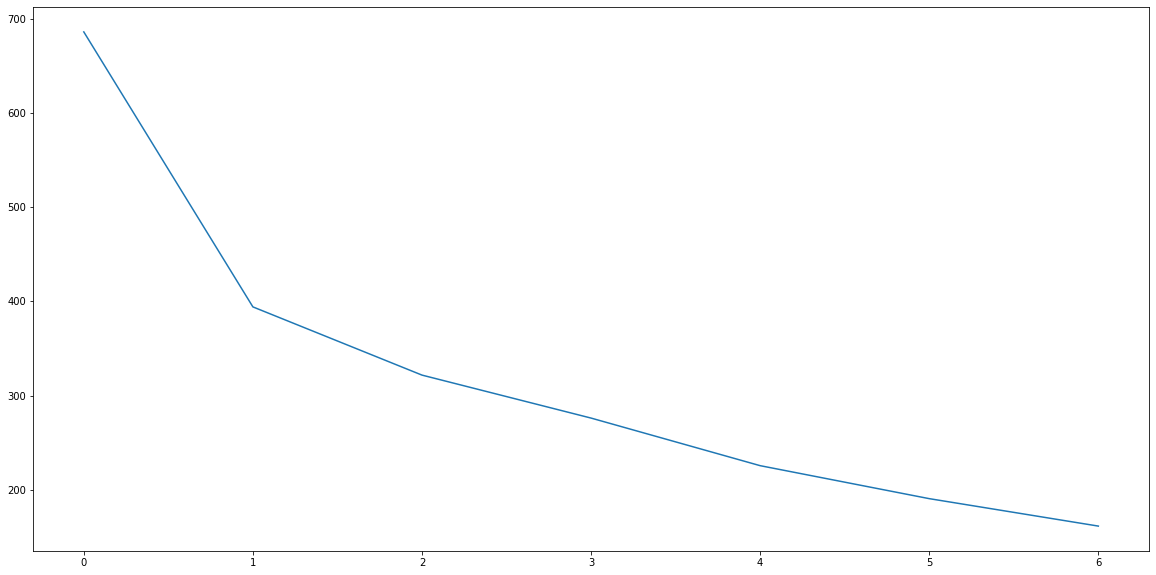

In [5585]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_df2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize=(20,10))
plt.plot(ssd)

Here the elbow curve falls near 1, but keeping the statistic and business aspect of it, we choose the number of clusters to be : 3

In [5586]:
# final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 50)
kmeans.fit(pca_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [5587]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [5588]:
# assign the label
pca_df2['cluster_id'] = kmeans.labels_
pca_df2.head()

PC1       PC2       PC3       PC4  cluster_id
0 -3.131872  1.546674 -0.481267  0.055881           1
1 -0.131785 -1.671799 -0.100328 -0.049290           2
2 -0.741069 -0.691548  1.551504  0.272454           2
3 -3.160909  2.351136  1.228481  0.249862           1
4  0.946293 -1.001889 -0.489047 -0.249619           2

### Let us check the number of rows in every cluster obtained from K Means

In [5589]:

pca_df2['cluster_id'].value_counts()

2    81
1    49
0    37
Name: cluster_id, dtype: int64

### Boxplotting the above information:

In [5590]:
# Check the count of observation per cluster
pca_df2['cluster_id'].value_counts().plot(kind = 'bar')

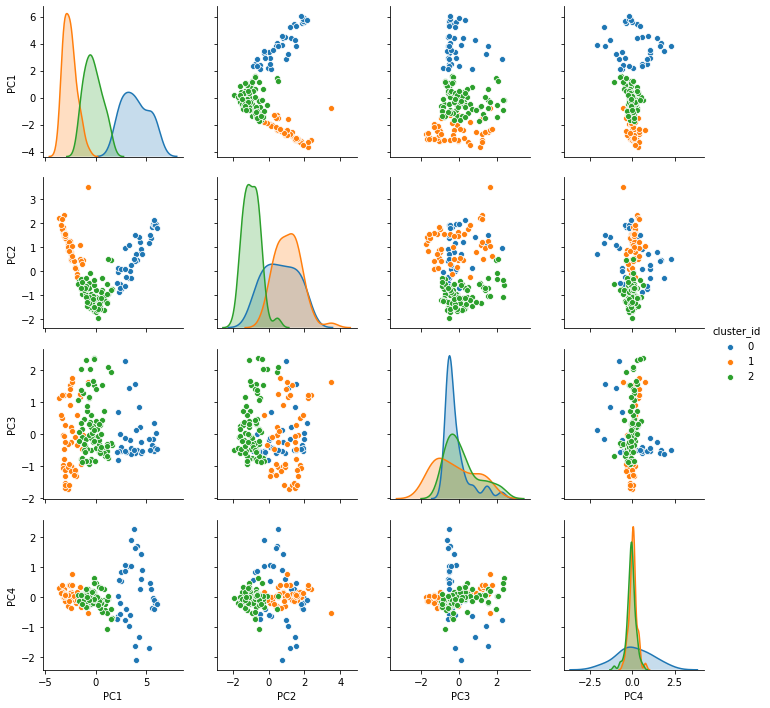

In [5591]:

# Plot the Cluster with respect to the clusters obtained


sns.pairplot(pca_df2, vars=pca_df2[['PC1','PC2','PC3','PC4']], hue="cluster_id")
plt.show()

# Cluster Profiling:

### After performing the K Means clustering, we perform the cluster profiling which is allocating the ID,country to the records:

#### Thus we merge the country,id data to the clusters and then analyse the data.

In [5592]:
pca_df2 = pd.concat([pca_df2, y], axis=1)
pca_df2.head()

PC1       PC2       PC3       PC4  cluster_id              country
0 -3.131872  1.546674 -0.481267  0.055881           1          Afghanistan
1 -0.131785 -1.671799 -0.100328 -0.049290           2              Albania
2 -0.741069 -0.691548  1.551504  0.272454           2              Algeria
3 -3.160909  2.351136  1.228481  0.249862           1               Angola
4  0.946293 -1.001889 -0.489047 -0.249619           2  Antigua and Barbuda

In [5593]:
dat_km=pca_df2.copy()
dat_km['ID']=pca_df2.index
dat_km.head()

PC1       PC2       PC3       PC4  cluster_id              country  ID
0 -3.131872  1.546674 -0.481267  0.055881           1          Afghanistan   0
1 -0.131785 -1.671799 -0.100328 -0.049290           2              Albania   1
2 -0.741069 -0.691548  1.551504  0.272454           2              Algeria   2
3 -3.160909  2.351136  1.228481  0.249862           1               Angola   3
4  0.946293 -1.001889 -0.489047 -0.249619           2  Antigua and Barbuda   4

In [5594]:
data['ID']=data.index
data.head()

child_mort    exports    health   imports   income  inflation  life_expec  \
0        90.2    70.4688   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.2000  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.6400  185.9820  1400.440  12900.0      16.10        76.5   
3       116.0  2199.1900  100.6050  1514.370   5900.0      20.87        60.1   
4        10.3  5551.0000  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer     gdpp  ID  
0      5.820    553.0   0  
1      1.650   4090.0   1  
2      2.890   4460.0   2  
3      5.861   3530.0   3  
4      2.130  12200.0   4

In [5595]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(data, dat_km[[ 'ID','country', 'cluster_id']], on = 'ID')

In [5596]:
dat5.head()

child_mort    exports    health   imports   income  inflation  life_expec  \
0        90.2    70.4688   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.2000  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.6400  185.9820  1400.440  12900.0      16.10        76.5   
3       116.0  2199.1900  100.6050  1514.370   5900.0      20.87        60.1   
4        10.3  5551.0000  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer     gdpp  ID              country  cluster_id  
0      5.820    553.0   0          Afghanistan           1  
1      1.650   4090.0   1              Albania           2  
2      2.890   4460.0   2              Algeria           2  
3      5.861   3530.0   3               Angola           1  
4      2.130  12200.0   4  Antigua and Barbuda           2

#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [5597]:
dat5.drop('ID', axis =1).groupby('cluster_id').mean()

child_mort       exports       health       imports        income  \
cluster_id                                                                      
0             5.344324  18780.372973  3285.879162  15698.857838  38711.081081   
1            85.748980    866.318829   114.435925    823.701184   3917.897959   
2            21.575309   2823.265230   397.460057   2933.086667  12430.617284   

            inflation  life_expec  total_fer          gdpp  
cluster_id                                                  
0            2.834373   79.805405   1.767838  37745.675676  
1            9.942551   60.500408   4.857939   1901.981633  
2            7.155899   72.979012   2.278889   6355.975309

# Visualizing the clusters with original variables:

In the above clustering we found that there are 3 types of clustering:
1. Underdeveloped: Countries with very low GDPP and  very low income with very high child mortality(Cluster 1)
2. Developing: Countries with medium GDPP and medium income with low child mortality(Cluster 2)
3. Developed: Countries with high GDPP and high income with low child mortality(Cluster 0)


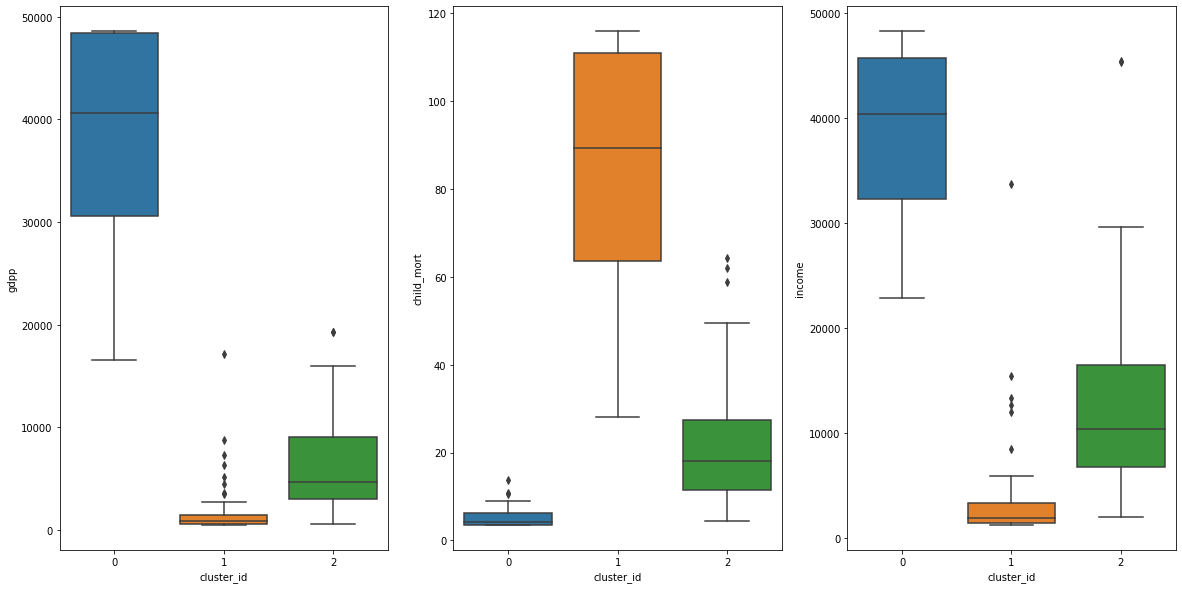

In [5598]:

plt.figure(figsize = (20,10))
var = ['gdpp', 'child_mort','income']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x= 'cluster_id', y = i[1], data = dat5)

In [5599]:
dat5.head()

child_mort    exports    health   imports   income  inflation  life_expec  \
0        90.2    70.4688   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.2000  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.6400  185.9820  1400.440  12900.0      16.10        76.5   
3       116.0  2199.1900  100.6050  1514.370   5900.0      20.87        60.1   
4        10.3  5551.0000  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer     gdpp  ID              country  cluster_id  
0      5.820    553.0   0          Afghanistan           1  
1      1.650   4090.0   1              Albania           2  
2      2.890   4460.0   2              Algeria           2  
3      5.861   3530.0   3               Angola           1  
4      2.130  12200.0   4  Antigua and Barbuda           2

# Finding the underdeveloped nations which needs immediate funding:

In [5600]:
#Let's use the concept of binning
# Find the countries

dat5=dat5.sort_values(['income','child_mort','gdpp'], ascending=[False,True,False])
print(dat5[dat5['cluster_id'] ==1]['country'][20:])

129                     Senegal
146                  Tajikistan
147                    Tanzania
32                         Chad
97                         Mali
149                 Timor-Leste
17                        Benin
136             Solomon Islands
81                     Kiribati
56                       Gambia
0                   Afghanistan
155                      Uganda
66                        Haiti
25                 Burkina Faso
50                      Eritrea
36                      Comoros
93                   Madagascar
64                Guinea-Bissau
126                      Rwanda
132                Sierra Leone
88                      Liberia
150                        Togo
94                       Malawi
26                      Burundi
106                  Mozambique
63                       Guinea
31     Central African Republic
37             Congo, Dem. Rep.
112                       Niger
Name: country, dtype: object


# Developing Nations:

In [5601]:
#Let's use the concept of binning
# Find the countries

dat5=dat5.sort_values(['income', 'child_mort','gdpp'], ascending=[True, False,True])
dat5[dat5['cluster_id'] ==2]['country'][:20]

109                    Nepal
12                Bangladesh
27                  Cambodia
83           Kyrgyz Republic
162                  Vanuatu
101    Micronesia, Fed. Sts.
107                  Myanmar
102                  Moldova
161               Uzbekistan
69                     India
164                  Vietnam
151                    Tonga
127                    Samoa
19                   Bolivia
120              Philippines
30                Cape Verde
65                    Guyana
18                    Bhutan
105                  Morocco
6                    Armenia
Name: country, dtype: object

# Developed Nations:

In [5602]:
#Let's use the concept of binning
# Find the countries

dat5=dat5.sort_values(['income', 'child_mort','gdpp'], ascending=[ True,False,True])
dat5[dat5['cluster_id'] ==0]['country']

10                  Bahamas
134         Slovak Republic
122                Portugal
98                    Malta
43           Czech Republic
60                   Greece
135                Slovenia
74                   Israel
138             South Korea
111             New Zealand
139                   Spain
42                   Cyprus
77                    Japan
158          United Kingdom
75                    Italy
54                   France
68                  Iceland
53                  Finland
58                  Germany
29                   Canada
11                  Bahrain
15                  Belgium
7                 Australia
144                  Sweden
8                   Austria
44                  Denmark
110             Netherlands
73                  Ireland
82                   Kuwait
23                   Brunei
123                   Qatar
157    United Arab Emirates
159           United States
145             Switzerland
133               Singapore
91               Lux

# <u>Recommendations:</u>

The cluster 0 is the most backward countries and the top few among them are:
<font color='green'><b>
-                       Kenya
-                     Lesotho
-                     Senegal
-                  Tajikistan
-                    Tanzania
-                       Nepal
-                         Chad
-                         Mali
-                 Timor-Leste
-                        Benin
-             Solomon Islands</font>

# Method 2 : Hierarchical Clustering + Profiling

#### Hierarchical clustering starts by treating each observation as a separate cluster.<br/> Then, it repeatedly executes the following two steps: <br/><br/>(1) identify the two clusters that are closest together, and <br/>(2) merge the two most similar clusters. This continues until all the clusters are merged together. 

## Single Linkage:

### computed between the two most similar parts of a cluster

In [5603]:
# single linkage
plt.figure(figsize = (20,10))
mergings = linkage(pca_df3, method="single", metric='euclidean',optimal_ordering=True)
dendrogram(mergings)
plt.show()

# Complete Linkage:

## Computed between the two least similar bits of a cluster

In [5604]:
# complete linkage
plt.figure(figsize=(20,10))
mergings = linkage(pca_df3, method="complete", metric='euclidean',optimal_ordering=True)
dendrogram(mergings)
plt.show()

From the above Dendrogram, we can see that when the cluster number is equal to 3, it covers a distance of around 60. Since it is optimal distance we choose the number of clusters to be 3.

## Cut the tree at an appropriate page:

### Since it is optimal distance we choose the number of clusters to be 3.

In [5605]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0])

In [5606]:
# assign cluster labels
data_h=pca_df3
data_h['cluster_labels'] = cluster_labels
data_h.head()

PC1       PC2       PC3       PC4  cluster_labels
0 -3.131872  1.546674 -0.481267  0.055881               0
1 -0.131785 -1.671799 -0.100328 -0.049290               1
2 -0.741069 -0.691548  1.551504  0.272454               1
3 -3.160909  2.351136  1.228481  0.249862               0
4  0.946293 -1.001889 -0.489047 -0.249619               1

## Plotting the count of rows vs Cluster labels obtained after Hierarchical Clustering

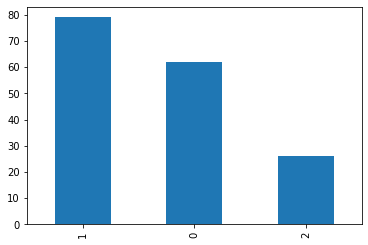

In [5607]:
# Check the count of observation per cluster
data_h['cluster_labels'].value_counts().plot(kind = 'bar')

In [5608]:
data_h.head()

PC1       PC2       PC3       PC4  cluster_labels
0 -3.131872  1.546674 -0.481267  0.055881               0
1 -0.131785 -1.671799 -0.100328 -0.049290               1
2 -0.741069 -0.691548  1.551504  0.272454               1
3 -3.160909  2.351136  1.228481  0.249862               0
4  0.946293 -1.001889 -0.489047 -0.249619               1

# Pairplotting the Cluster with respect to the clusters obtained from Hierarchical Clustering

In [5609]:

# Plot the Cluster with respect to the clusters obtained


sns.pairplot(data_h, vars=data_h[['PC1','PC2','PC3','PC4']], hue="cluster_labels")
plt.show()

# Cluster Profiling:

In [5610]:
data_h['ID']=data_h.index
data_h.head()

PC1       PC2       PC3       PC4  cluster_labels  ID
0 -3.131872  1.546674 -0.481267  0.055881               0   0
1 -0.131785 -1.671799 -0.100328 -0.049290               1   1
2 -0.741069 -0.691548  1.551504  0.272454               1   2
3 -3.160909  2.351136  1.228481  0.249862               0   3
4  0.946293 -1.001889 -0.489047 -0.249619               1   4

In [5611]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(data, data_h[['ID', 'cluster_labels']], on = 'ID')


In [5612]:
dat5 = pd.merge(dat5, dat_km[[ 'ID','country']], on = 'ID')
dat5.head()

child_mort    exports    health   imports   income  inflation  life_expec  \
0        90.2    70.4688   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.2000  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.6400  185.9820  1400.440  12900.0      16.10        76.5   
3       116.0  2199.1900  100.6050  1514.370   5900.0      20.87        60.1   
4        10.3  5551.0000  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer     gdpp  ID  cluster_labels              country  
0      5.820    553.0   0               0          Afghanistan  
1      1.650   4090.0   1               1              Albania  
2      2.890   4460.0   2               1              Algeria  
3      5.861   3530.0   3               0               Angola  
4      2.130  12200.0   4               1  Antigua and Barbuda

### Finding the mean for various factors:

In [5613]:
dat5.drop('ID',axis=1).groupby('cluster_labels').mean()

child_mort       exports       health       imports  \
cluster_labels                                                        
0                75.895161    906.827668   121.246364    951.875516   
1                16.506582   4271.736592   666.116587   4362.955646   
2                 5.289231  22012.207692  3816.871885  17504.205385   

                      income  inflation  life_expec  total_fer          gdpp  
cluster_labels                                                                
0                4217.532258   8.716210   62.021290   4.468210   2055.501613  
1               16023.670886   6.877499   74.630380   2.078861   9527.721519  
2               42454.230769   3.382969   80.288462   1.799231  43249.615385

### Now we box plot the data to find the characteristics of each cluster:

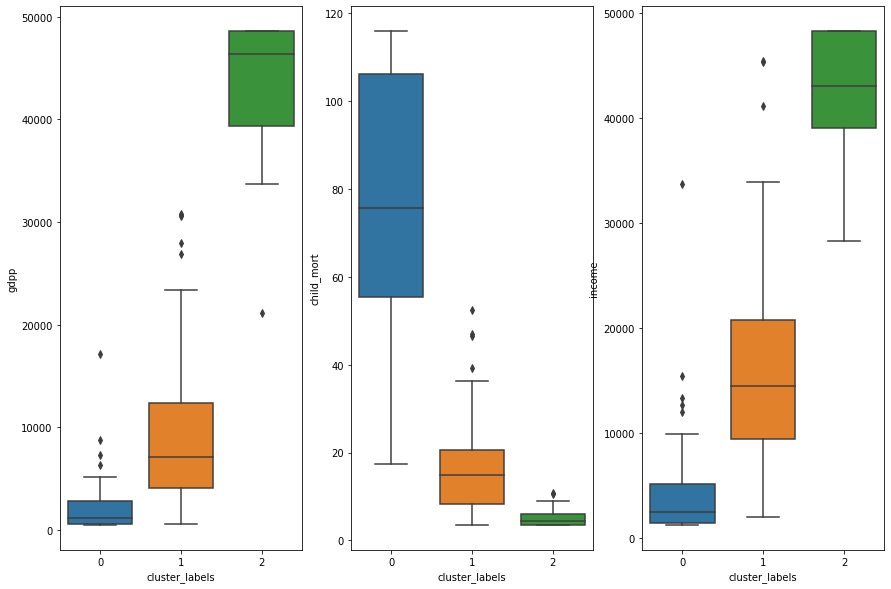

In [5614]:

plt.figure(figsize = (20,10))
var = ['gdpp', 'child_mort','income']
for i in enumerate(var):
    plt.subplot(1,4,i[0]+1)
    sns.boxplot(x= 'cluster_labels', y = i[1], data = dat5)

### Clearly from the above box plots we could comme to a conclusion that the cluster 0 has the minimum income and gdpp with very high child mortality rate. So we ll proceed with getting the countries which are in Cluster 0

In [5615]:
print(dat5.head())

   child_mort    exports    health   imports   income  inflation  life_expec  \
0        90.2    70.4688   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.2000  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.6400  185.9820  1400.440  12900.0      16.10        76.5   
3       116.0  2199.1900  100.6050  1514.370   5900.0      20.87        60.1   
4        10.3  5551.0000  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer     gdpp  ID  cluster_labels              country  
0      5.820    553.0   0               0          Afghanistan  
1      1.650   4090.0   1               1              Albania  
2      2.890   4460.0   2               1              Algeria  
3      5.861   3530.0   3               0               Angola  
4      2.130  12200.0   4               1  Antigua and Barbuda  


# Developed Countries:

In [5616]:
#Let's use the concept of binning
# Find the countries


dat5=dat5.sort_values(['income', 'child_mort','gdpp'], ascending=[True, False,True])
dat5[dat5['cluster_labels'] ==2]['country'][:20]

98              Malta
111       New Zealand
77              Japan
158    United Kingdom
75              Italy
54             France
68            Iceland
53            Finland
58            Germany
29             Canada
15            Belgium
7           Australia
144            Sweden
8             Austria
44            Denmark
110       Netherlands
73            Ireland
82             Kuwait
23             Brunei
123             Qatar
Name: country, dtype: object

# Developing Countries:

In [5617]:

dat5=dat5.sort_values(['income', 'gdpp'], ascending=[False, False])
dat5[dat5['cluster_labels'] ==1]['country'][:20]

128       Saudi Arabia
115               Oman
11             Bahrain
42              Cyprus
139              Spain
138        South Korea
74              Israel
89               Libya
60              Greece
135           Slovenia
43      Czech Republic
122           Portugal
134    Slovak Republic
125             Russia
10             Bahamas
51             Estonia
67             Hungary
121             Poland
90           Lithuania
95            Malaysia
Name: country, dtype: object

# Under developed Countries that need immediate funding:

In [5618]:
#Let's use the concept of binning
# Find the countries
dat5=dat5.sort_values(['income', 'gdpp'], ascending=[False, False])
dat5[dat5['cluster_labels'] ==0]['country'][:20]

49     Equatorial Guinea
55                 Gabon
21              Botswana
72                  Iraq
137         South Africa
154         Turkmenistan
108              Namibia
52                  Fiji
62             Guatemala
18                Bhutan
3                 Angola
65                Guyana
120          Philippines
127                Samoa
38           Congo, Rep.
113              Nigeria
151                Tonga
165                Yemen
69                 India
116             Pakistan
Name: country, dtype: object

## Classification Of countries:
Thus we have clustered the countries into 3 types as follows:<br/>
1. Underdeveloped: Countries with low GDPP and low income with high child mortality(Cluster 0)
2. Developing: Countries with medium GDPP and medium income with low child mortality(Cluster 1)
3. Developed: Countries with high GDPP and high income with low child mortality(Cluster 2)

# <u>Recommendations:</u>

### The Cluster 0 is the most backward countries which need an immediate aid from the NGO. the top few countries among them are:
<font color='green'><b>
1.            Equatorial Guinea
2.                        Gabon
3.                     Botswana
4.                         Iraq
5.                South Africa
6.                     Namibia
7.                        Angola
8.                  Congo, Rep.
9.                     Nigeria
10.                       Yemen</b></font>

# Conclusion:

Thus we first derived PCA and then did 2 methods of clustering from which we got 3 clusters of countries. From these clusters, we got the needed group of countries which needed dire aid from the NGO. In this particular case, we could notice that oth Hierarchical and K Means Clustering seems to be behave in the same way.